In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('loan_application.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Here we have to predict Loan Status of the application having 12 features.

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_ID is of no use, so we will drop the column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 max rows in the dataset and there is no null value present. But there are some misiing values in many columns. There are both categorical and numerical columns in the dataset

<AxesSubplot:>

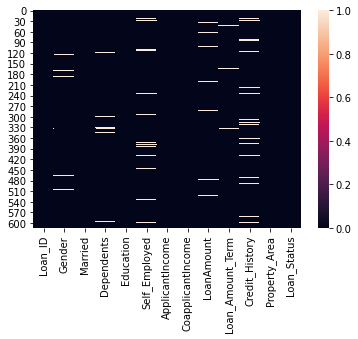

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see that there are lot of missing values present in the features. We will replace it using imputer method.

In [9]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will use simple imputer to fill the missing values using "most frequent" and "mean" technique.

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imp= SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1, 1))
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
imp= SimpleImputer(strategy='most_frequent')
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1, 1))
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [13]:
imp= SimpleImputer(strategy='most_frequent')
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1, 1))
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [14]:
imp= SimpleImputer(strategy='most_frequent')
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1, 1))
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [15]:
imp= SimpleImputer(strategy='most_frequent')
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1, 1))
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [17]:
imp1= SimpleImputer(missing_values=np.nan,strategy='mean') 

In [18]:
df['LoanAmount']=imp1.fit_transform(df['LoanAmount'].values.reshape(-1, 1))
df['Loan_Amount_Term']=imp1.fit_transform(df['Loan_Amount_Term'].values.reshape(-1, 1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Handling Numerical Columns

In [20]:
num_data = df.select_dtypes(include=['int','float'])
print(num_data.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


Data Visualization

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

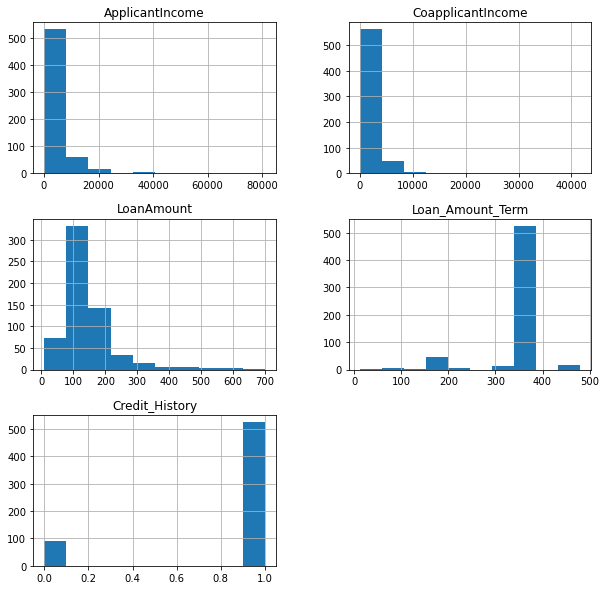

In [21]:
num_data.hist(figsize=(10,10))

<AxesSubplot:ylabel='Density'>

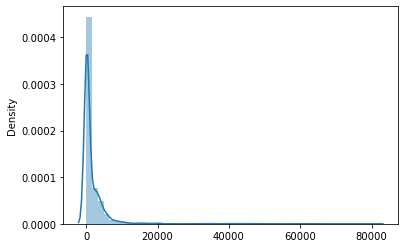

In [88]:
sns.distplot(num_data)

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


There are values which are on diffrent scales. So, we will tune them to same scale by using scaling technique so the our machine learning models prediction will be of greater accuracy.

Count of No. of rows in every column are same, it means that there are no missing values in the data set. In columns ApplicantIncome, CoapplicantIncome and LoanAmount is greater than median, it means skewness is present in the system.

In column ApplicantIncome, CoapplicantIncome and LoanAmount there is large gap b/w max and 75th percentile,there are chances that some outliers may present. 

High standard deviation in column ApplicantIncome, CoapplicantIncome, means data is spreaded.

Handling Object type Columns

In [23]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

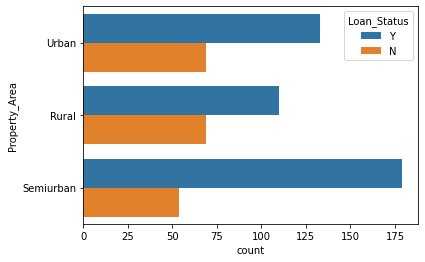

In [25]:
sns.countplot(y='Property_Area', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

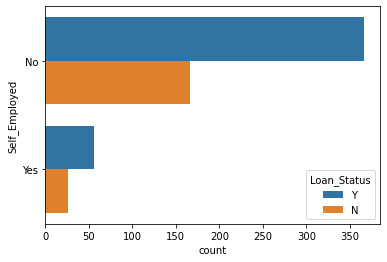

In [26]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Education'>

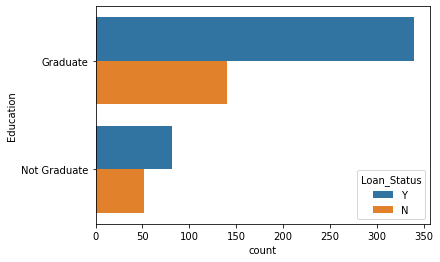

In [27]:
sns.countplot(y='Education', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Dependents'>

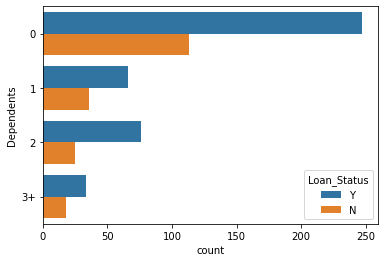

In [30]:
sns.countplot(y='Dependents', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Gender'>

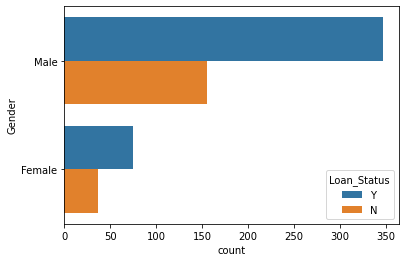

In [31]:
sns.countplot(y='Gender', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Married'>

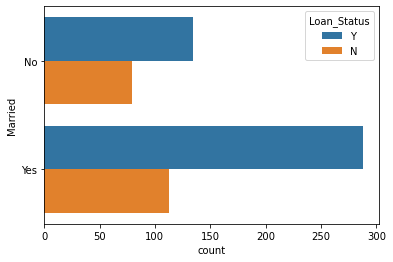

In [32]:
sns.countplot(y='Married', hue='Loan_Status', data = categorical_data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

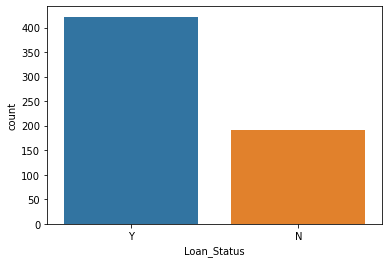

In [28]:
sns.countplot(df.Loan_Status)

It means more loans are approved than rejected.
Male applicants count is more than Female.
Married applicant count is more than Non-married.
Graduate count is more than non-Graduate.
self-employed count is less than Non-Selfemployed.

In [29]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

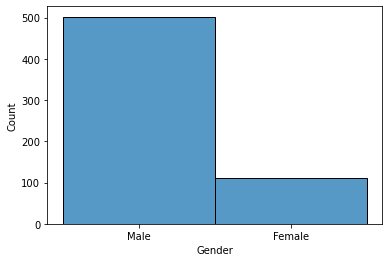

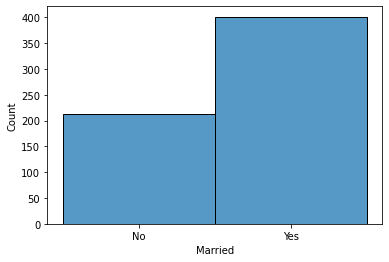

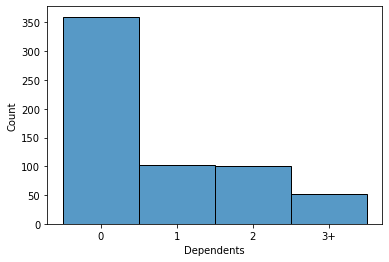

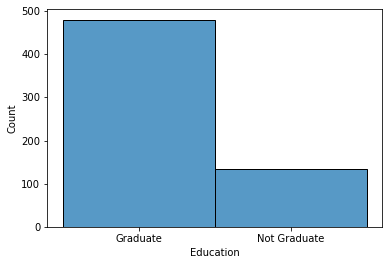

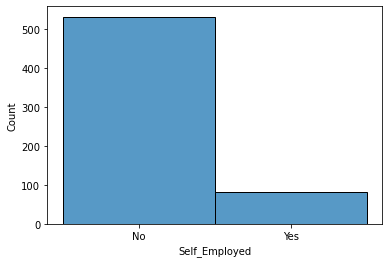

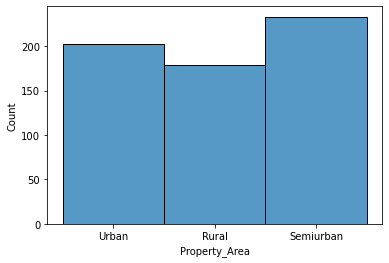

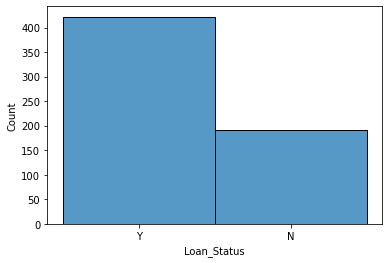

In [33]:
for i in categorical_data:
  sns.histplot(df[i])
  plt.show()

In [35]:
df.isnull().count()

Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [36]:
df.duplicated().sum()

0

No duplicate values, so we can proceed

In [37]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [38]:
df.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y


Now, we will convert the object type features to integer by using labelencoder.

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Gender                  AxesSubplot(0.125,0.657941;0.110714x0.222059)
Married              AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Dependents           AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Education            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Self_Employed        AxesSubplot(0.656429,0.657941;0.110714x0.222059)
ApplicantIncome      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
CoapplicantIncome       AxesSubplot(0.125,0.391471;0.110714x0.222059)
LoanAmount           AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Loan_Amount_Term     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Credit_History       AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Property_Area        AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Loan_Status          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

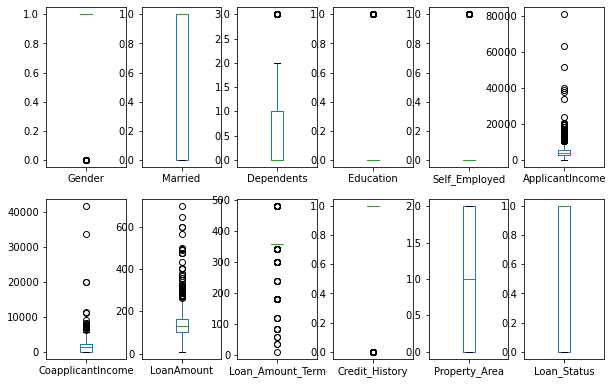

In [40]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

There is presence of outliers in ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term.

In [41]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [42]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

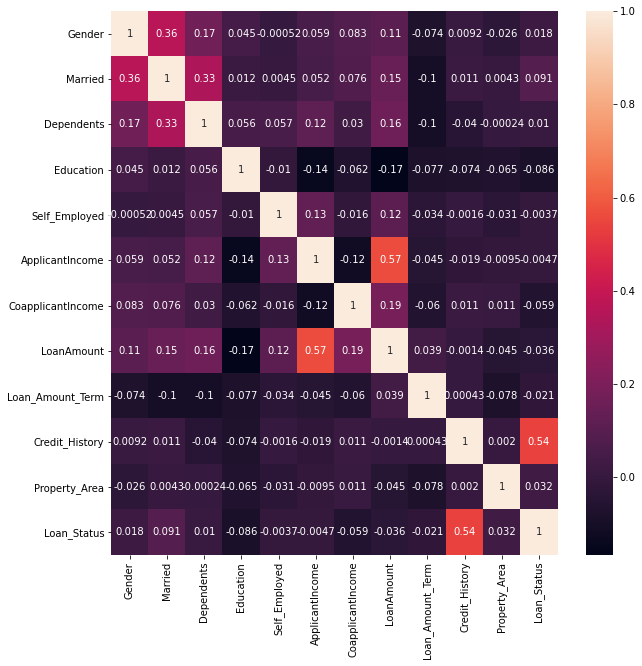

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 10})

We can see from above that variables Credit_History, ApplicantIncome and married are good correlated.

# Multicollinearity using VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
x=df.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [48]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [45]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [49]:
vif_calc()

             features  VIF Factor
0              Gender    6.003147
1             Married    3.654602
2          Dependents    1.791662
3           Education    1.305335
4       Self_Employed    1.176629
5     ApplicantIncome    2.889373
6   CoapplicantIncome    1.480470
7          LoanAmount    6.853537
8    Loan_Amount_Term   10.350993
9      Credit_History    6.076363
10      Property_Area    2.571967


There is no as such multicollinearity in the data, so we can proceed further.

# Removing Outliers using Zscore

In [50]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [51]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7]))


In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [54]:
df=df_new

In [55]:
df.shape

(577, 12)

In [56]:
loss_percentage=(614-577)/614*100
print(loss_percentage)

6.026058631921824


So, loss is only 6%.

# Removing Skewness

In [57]:
from sklearn.preprocessing import power_transform

In [58]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85905094e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.85905094e-01, -2.42876026e+00,  2.36103342e-03]])

# Scaling of the data

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85905094e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.85905094e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.85905094e-01, -2.42876026e+00,  2.36103342e-03]])

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [69]:
x_train.shape

(429, 11)

In [71]:
x_test.shape

(185, 11)

In [72]:
y_train.shape

(429,)

In [73]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[lr,gnb,svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
actual value 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int64
0.772972972972973
[[ 22  39]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.88      0.36      0.51        61
           1       0.76      0.98      0.85       124

    accuracy                           0.77       185
   macro avg       0.82      0.67      0.68       185
weighted avg       0.80      0.77      0.74       185



Predicted result value: [0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 

From above logistic and classifiers below are the accuracy percentage: logistic 77.29% GaussianNB 77.29% SVC 77.83% DecisionTreeClassifier 75.67% KNeighborsClassifier 72.97%, AdaBoost 72.97% ,GradientBoost 74.05%

So, out of these top three models are SVC, GaussianNB and logistic. we will test CV score to confirm the accuracy score.

# Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()

model_cv=[lr,gnb,svc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.81300813 0.77235772 0.7804878  0.85365854 0.81147541]
0.8061975209916034
0.0287503387795815
[0.81300813 0.75609756 0.7804878  0.85365854 0.81967213]
0.8045848327335733
0.03358121259089467
[0.82113821 0.77235772 0.78861789 0.85365854 0.81147541]
0.8094495535119284
0.027946109614110835


In Cross validation also our scores are matching,and in this SVC model is performing best.

Now, we will try to improve accuracy using Hypermeter Tuning

# Hypermeter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_svc={'kernel':['linear','rbf','poly'],'C':[1,10]}

modelsvc=SVC()

In [79]:
gridsvc=GridSearchCV(estimator=modelsvc,param_grid=param_svc)
gridsvc.fit(x,y)
print(gridsvc)
print(gridsvc.best_score_)
print(gridsvc.best_estimator_)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})
0.809462881514061
SVC(C=1, kernel='linear')
{'C': 1, 'kernel': 'linear'}


Now, we will use the above tuning values to calculate the best accuracy.

In [80]:
svc_final=SVC(kernel='linear',C=1)
svc_final= SVC()
svc_final.fit(x_train,y_train)
svc_final.score(x_train,y_train)

0.8368298368298368

In [81]:
pred_final=svc_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y_test)

Predicted result value: [0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
actual value 399    0
239    1
61     1
543    1
301    1
      ..
342    1
326    1
487    0
435    1
206    1
Name: Loan_Status, Length: 185, dtype: int64


In [82]:
print('accuracy_score:',accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

accuracy_score: 0.7783783783783784
[[ 22  39]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        61
           1       0.76      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.84      0.67      0.69       185
weighted avg       0.81      0.78      0.74       185



So, accuracy is 78% of our best model svc.

In [86]:
import pickle
filename='Loan_Application_Status.pkl'
pickle.dump(svc_final, open(filename,'wb'))